In [3]:
%runfile zeta-types-smc/zetatypes/util/lazylist.py
%runfile zeta-types-smc/zetatypes/ts/monoid.py
%runfile zeta-types-smc/zetatypes/ts/ring.py
%runfile zeta-types-smc/zetatypes/util/berlekamp.py
%runfile zeta-types-smc/zetatypes/ts/complex.py

In [2]:
#%runfile zeta-types-smc/zetatypes/mf/mf.py
#%runfile zeta-types-smc/zetatypes/mf/library.py

In [4]:
#%runfile MFunction.sage

In [2]:
#Rank 4: EllipticCurve([1, -1, 0, -79, 289])

In [19]:
E = EllipticCurve("5077.a1")
N = E.conductor()
print E, ". Conductor: ", N

Elliptic Curve defined by y^2 + y = x^3 - 7*x + 6 over Rational Field . Conductor:  5077


In [20]:
maybezero = CC(exp(-((2*pi)/sqrt(N))))
print maybezero

0.915594903441584


In [21]:
mval = sum(an * maybezero^(n + 1) / (n + 1) for n, an in enumerate(E.anlist(100000)[1:]))

print CC(mval)

-0.256318669998015


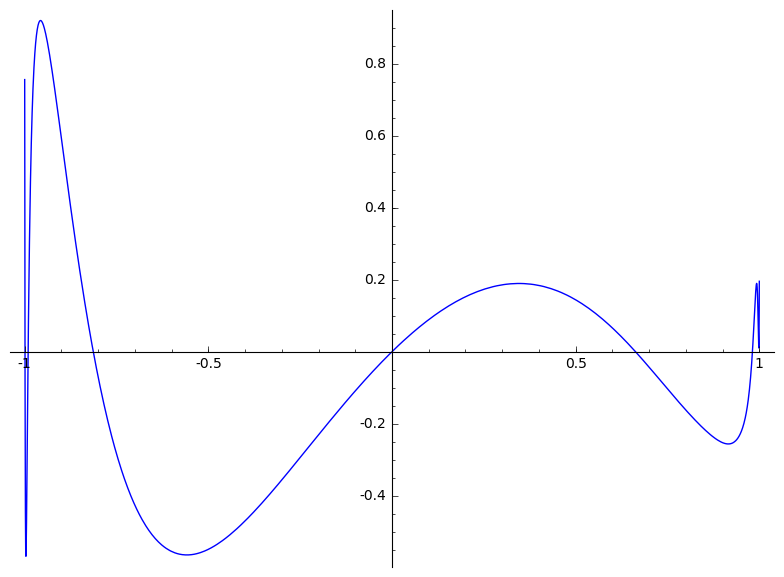

In [22]:
f = lambda x: sum(an * x^(n + 1) / (n + 1) for n, an in enumerate(E.anlist(1000)[1:]))
plot(f)

In [5]:
def amt_terms(r, bound = 1, delta = 0.001):
    if bound == 1:
        return ceil((log(delta) + log(1 - r))/log(r)) + 1
    raise ValueError("No known bound for error when a_n is bounded by " + bound)
    
def bounded_m_approx(f, z, bound = 1, delta = 0.001):
    r = abs(z)
    if r >= 1:
        raise ValueError("This sequence diverges!")
    else:
        N = amt_terms(r, bound = bound, delta = delta)
        return sum(f(n) * z^(n - 1) for n in range(1, N + 1))

In [6]:
bounded_m_approx(moebius, 0.999)

-1.99010100302504

In [7]:
amt_terms(0.95)

195

In [144]:
# [(conductor, absolute value)]
def generate_data(maxmod = 20):
    PR = PolynomialRing(CC,"t")
    t = PR.gen()
    #def crazyfix(w):
    #    scale = 10^15
    #    z = CC(w)
    #    r = round(real(z) * scale) / scale
    #    i = round(imag(z) * scale) / scale
    #    return r + i * I
    
    TSC = ComplexTannakianSymbols()
    for mod in range(1, maxmod):
        R = DirichletGroup(mod)
        for x in R.list():
            N = x.conductor()
            
            if N > 1:
            
                pol = PR([CC(x(n + 1)) for n in range(0, N - 1)])
                #print pol
                zeroes = pol.roots()

                #ts = TSC.getTSFromBellCoeffs(ll, 2 * maxmod + 10)
                #zeroes = [abs(z) for z in ts.downstairs()]
                for zero, mult in zeroes:
                    yield N, log(abs(zero))

In [149]:
dat = list(generate_data(200)); print dat

KeyboardInterrupt: 

In [ ]:
scatter_plot(dat)

In [8]:
mob = LazyList(lambda n: moebius(n), offset = 1)
# TODO: give lazylist call function

m_mu = lambda z: bounded_m_approx(lambda n: mob[n], z)
#m_mu_der = lambda z: m_der_approx(moebius, z)
#m_mu_der_n = lambda n: lambda z: m_der_n_approx(moebius, n, z)

In [9]:
def make_r_plot(r):
    #print "Current r: " + str(r)
    return plot(lambda x: arg(m_mu(CC(r * e^(I*x)))), (0, 2*pi), plot_points = 100)

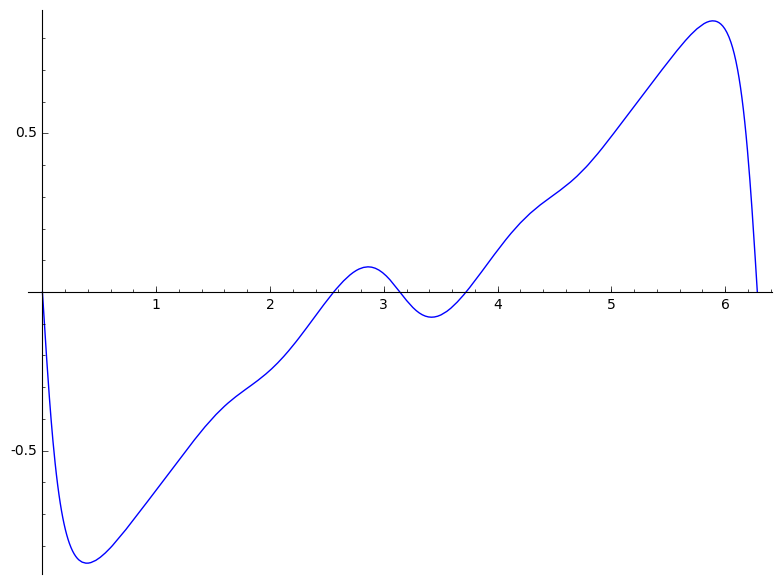

0.752521038055


In [10]:
import time

start = time.time()
make_r_plot(.5).show()
end = time.time()
print(end - start)

In [ ]:
#plot(lambda x: m_mu(x) - (1/(x^2 - 1) + 2 - x) if abs(x) <= .9 else None, (-1, 1))

In [ ]:
#plot(lambda x: m_mu(x) if abs(x) <= .99 else None, (-1, 1))

In [ ]:
#plot(lambda x: m_mu_der(x) if abs(x) <= .9 else None, (-1, 1))

In [ ]:
plot(lambda x: (1 - x^2) * m_mu(x) if abs(x) <= .99 else None, (-1, 1))

In [ ]:
plot(lambda x: (-2*x)*m_mu(x) + (1 - x^2)*m_mu_der(x) if abs(x) <= .99 else None, (-1, 1))

In [ ]:
#complex_plot(lambda z: m_mu(z) if abs(z) <= .99 else NaN, (-1, 1), (-1, 1))

In [ ]:
plot3d(lambda x, y: abs(m_approx(lambda n: mob[n], CC(x + I*y))) if x*x + y*y <= (.9)^2 else -1, (-1, 1), (-1, 1))

In [ ]:
polar_plot(lambda x: abs(m_mu(CC(.9 * e^(I*x)))), (0, 2*pi))

In [ ]:
p = make_plot(0.97)

In [ ]:
p + sum(line([((2 * pi * i) / pr, 0), ((2 * pi * i) / pr, 5)], color="red") for pr in [11] for i in range(1, pr) if pr in Primes())

In [ ]:
def make_plot(r):
    print "Current r: " + str(r)
    return plot(lambda x: arg(m_mu(CC(r * e^(I*x)))), (0, 2*pi), plot_points=100)

plots = [make_plot(r) for r in sxrange(0, 1,.01)]
print "Finished!"

In [ ]:
anim = animate(plots)

In [ ]:
anim.save(filename = "gif.mp4", use_ffmpeg=True)

In [ ]:
anim.show()

In [ ]:
plots[-1]

In [ ]:
#plots[-2] + sum(line([((2 * pi * i) / pr, 0), ((2 * pi * i) / pr, 20)], color="red") for pr in [17, 19] for i in range(1, pr) if pr in Primes())

In [ ]:
for p in plots:
    p.axes_range(ymin=0, ymax=22)

In [ ]:
animate(plots).save(filename = "gif.mp4", use_ffmpeg=True)

In [ ]:
plot3d(lambda x, y: abs(m_mu(CC(x * e^(I*y)))), (0, .99), (0, 2*pi), plot_points = 200)